# Regression Polynomiale

# Etape 1 : Chargement des Bibliothèques

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Etape 2 : Chargement des données du 'Position_Salaries.csv' (level par raport au salaire)

In [37]:
data=pd.read_csv('/Position_Salaries.csv')


In [38]:

x=data.iloc[:,1:-1]
y=data.iloc[:,-1]


In [39]:
x

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [40]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

## Etape 2 : Diviser les données en train 0.8 et test 0.2

In [41]:

#split x ey y
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## Etape 3 : Entrainer le modèle de regression linéaire (lin_reg)

In [42]:

# Création du modèle de la regression linéaire
model_l = LinearRegression()

# Entraînement du modèle
model_l.fit(x_train, y_train)

# Prédiction sur les données de test
ypred_linear = model_l.predict(x_test)
# Prédiction sur tout les données
ypred_total= model_l.predict(x)




## claculer le score

In [43]:
# Calcul du score R2
score = r2_score(y_test, ypred_linear)
print("Le score de la regression linéaire est", score)

Le score de la regression linéaire est -3.182918000304836


## Etape 5 : Visualisation des résultats du modèle linéaire

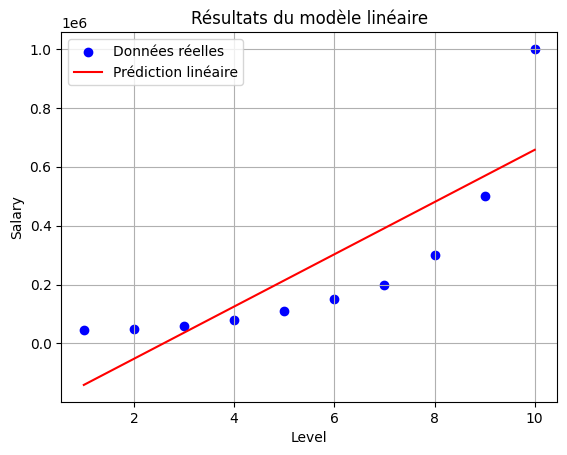

In [44]:
# Tracé des données réelles
plt.scatter(x, y, color='blue', label='Données réelles')

# Tracé de la prédiction du modèle linéaire avec la totalité des donnée x
plt.plot(x, ypred_total, color='red', label='Prédiction linéaire')

# Paramètres du graphe
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Résultats du modèle linéaire')
plt.legend()
plt.grid(True)

# Affichage du graphe
plt.show()


## Etape 4 : Entrainer le modèle de regression polynomiale degree=4 (poly_reg)

In [45]:

poly = PolynomialFeatures(degree=4)
p_train = poly.fit_transform(x_train)
p_test = poly.fit_transform(x_test)
#transformation de tous les données x
p_tot = poly.fit_transform(x)

# Création du modèle
modelp = LinearRegression().fit(p_train, y_train)

# Prédiction polymial
ypred_pol = modelp.predict(p_test)
# Prédiction de tous les données x
ypred_pol_tot = modelp.predict(p_tot)




## calculer le score

In [46]:
# Évaluation des performances en utilisant le score R2
score2 = r2_score(y, ypred_pol_tot)

print("Le score de la méthode polynomiale est", score2)

Le score de la méthode polynomiale est 0.9967954719208758


## Etape 6 : Visualisation des résultats du modèle de regression polynomiale

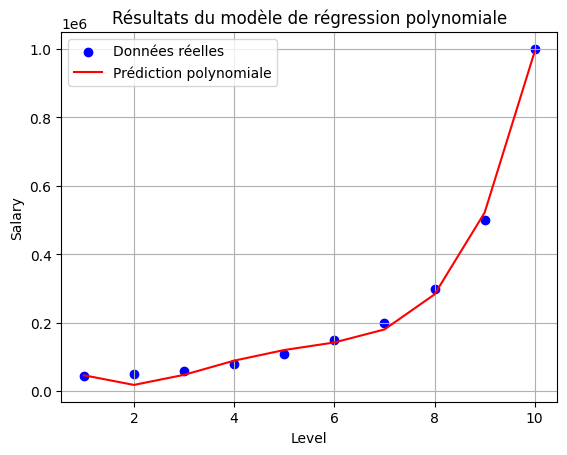

In [47]:

plt.scatter(x, y, color='blue', label='Données réelles')


# Tri des données de test
new_x_poly, new_y_poly = zip(*sorted(zip(x, ypred_pol_tot)))

# Tracé des données réelles 
plt.plot(x, ypred_pol_tot, color='red', label='Prédiction polynomiale')

# Paramètres du graphe
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Résultats du modèle de régression polynomiale')
plt.legend()
plt.grid(True)

# Affichage du graphe
plt.show()


## Etape 8 : Prédire un nouveau résultat d'une seule observation avec la regression linéaire level =6.5


In [48]:
x_lin = [[6.5]]
y_res = model_l.predict(x_lin)
print("Le résultat de prédiction avec la regression linéaire est",y_res) 


Le résultat de prédiction avec la regression linéaire est [347138.88888889]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Etape 9 : Prédire un nouveau résultat d'une seule observation avec la regression polynomiale level =6.5

In [49]:

x2 = [[6.5]]
predX = modelp.predict(poly.transform(x2))
print("Le résultat de prédiction avec la regression polynomiale pour 6.5 est", predX)


Le résultat de prédiction avec la regression polynomiale pour 6.5 est [157105.02199415]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


## afficher la lise des scores pour les degrees entre 1 et 32)

In [50]:

max_d = 32
degrees = range(1, max_d + 1)
scores = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    p_train = poly.fit_transform(x_train)
    p_test = poly.fit_transform(x_test)
    p_tot = poly.fit_transform(x)
    
    # Création du modèle
    modelp = LinearRegression().fit(p_train, y_train)
    
    # Prédiction
    ypred_pol = modelp.predict(p_test)
    ypred_pol_tot = modelp.predict(p_tot)
    
    # Évaluation des performances en utilisant le score R2
    score = r2_score(y, ypred_pol_tot)
    
    # Ajout du score à la liste
    scores.append(score)

    # Affichage du score
    print("Le score pour un degré de", d, "est", score)

print("La liste complète des scores est :", scores)


Le score pour un degré de 1 est 0.6618145257681076
Le score pour un degré de 2 est 0.9150627279186617
Le score pour un degré de 3 est 0.9797413235142859
Le score pour un degré de 4 est 0.9967954719208758
Le score pour un degré de 5 est 0.999510312151617
Le score pour un degré de 6 est 0.9998314084358935
Le score pour un degré de 7 est 0.9999420160995615
Le score pour un degré de 8 est 0.999954926765294
Le score pour un degré de 9 est 0.9999575503337488
Le score pour un degré de 10 est 0.9999598987329835
Le score pour un degré de 11 est 0.9999663704441673
Le score pour un degré de 12 est 0.9999903952747426
Le score pour un degré de 13 est 0.9998809534034667
Le score pour un degré de 14 est 0.9962834973514836
Le score pour un degré de 15 est 0.9493321682694694
Le score pour un degré de 16 est 0.4893104025276046
Le score pour un degré de 17 est -3.337965750622776
Le score pour un degré de 18 est -31.868492409547528
Le score pour un degré de 19 est -228.49220020649832
Le score pour un degr

## Etape 9 :visuliser les score par rapport au degree (degree entre 1 et 32)

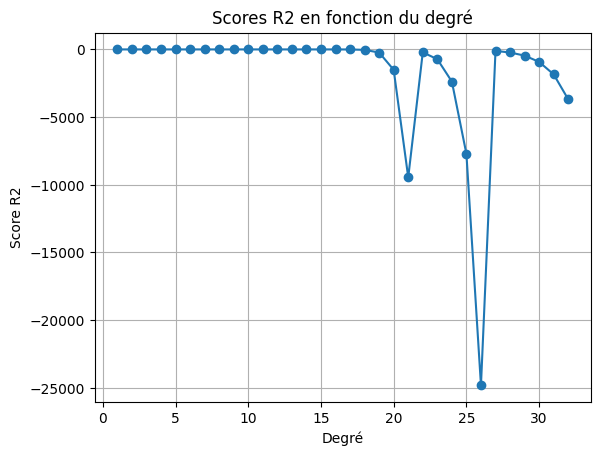

In [51]:
# Tracé des scores par rapport au degré
plt.plot(degrees, scores, 'o-')
plt.xlabel('Degré')
plt.ylabel('Score R2')
plt.title('Scores R2 en fonction du degré')
plt.grid(True)
plt.show()
